# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import prim, scenario_discovery_util
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments, outcomes = load_results("data/Hamarat et al 2013.gz")

In [3]:
data = outcomes["fraction renewables"]

In [4]:
difference = pd.Series([a[-1] - a[0] for a in data])

In [5]:
difference.name = "poop"

## PRIM

In [6]:
prim_alg=prim.Prim(experiments[["starting construction time", "time of nuclear power plant ban"]], difference > 0, threshold=0.8, peel_alpha=0.1)

In [7]:
box = prim_alg.find_box()

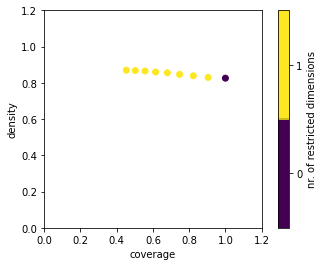

In [8]:
box.show_tradeoff()
plt.show()

In [9]:
box.mean

0.8698279869827987

### PCA preprocessing

In [10]:
rotated_experiments, rotation_matrix = prim.pca_preprocess(experiments[["progress ratio wind", "progress ratio nuclear"]], difference > 0)

In [11]:
# perform prim on modified results tuple
prim_obj = prim.Prim(rotated_experiments, difference > 0, threshold=0.8)
box = prim_obj.find_box()

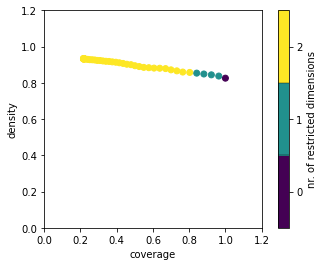

In [12]:
box.show_tradeoff()
plt.show()

### Noise from Jan

In [13]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)



NameError: name 'y1' is not defined